# **Problem Statment**

Dataset:50_Startups.csv

Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **Importing the dataset**

In [3]:
df=pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# **Performing EDA**

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


By seeing the info aboutbthe dataset we will get to know that there is no null values in dataset and there are 4 float columns and one object column.so we have to treat th object column first.

In [7]:
#Checking the categories of State variable
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [9]:
df1=pd.get_dummies(df,columns=['State'])

In [10]:
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [11]:
#Renaming the columns
df1 = df1.rename({'R&D Spend':'rnd', 'Administration':'admin', 'Marketing Spend':'ms', 'Profit':'p',
       'State_California':'ca', 'State_Florida':'fl', 'State_New York':'ny'},axis=1)

In [12]:
df1.head()

,rnd,admin,ms,p,ca,fl,ny
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [14]:
#checking for duplicates
df1[df1.duplicated()].shape

(0, 7)

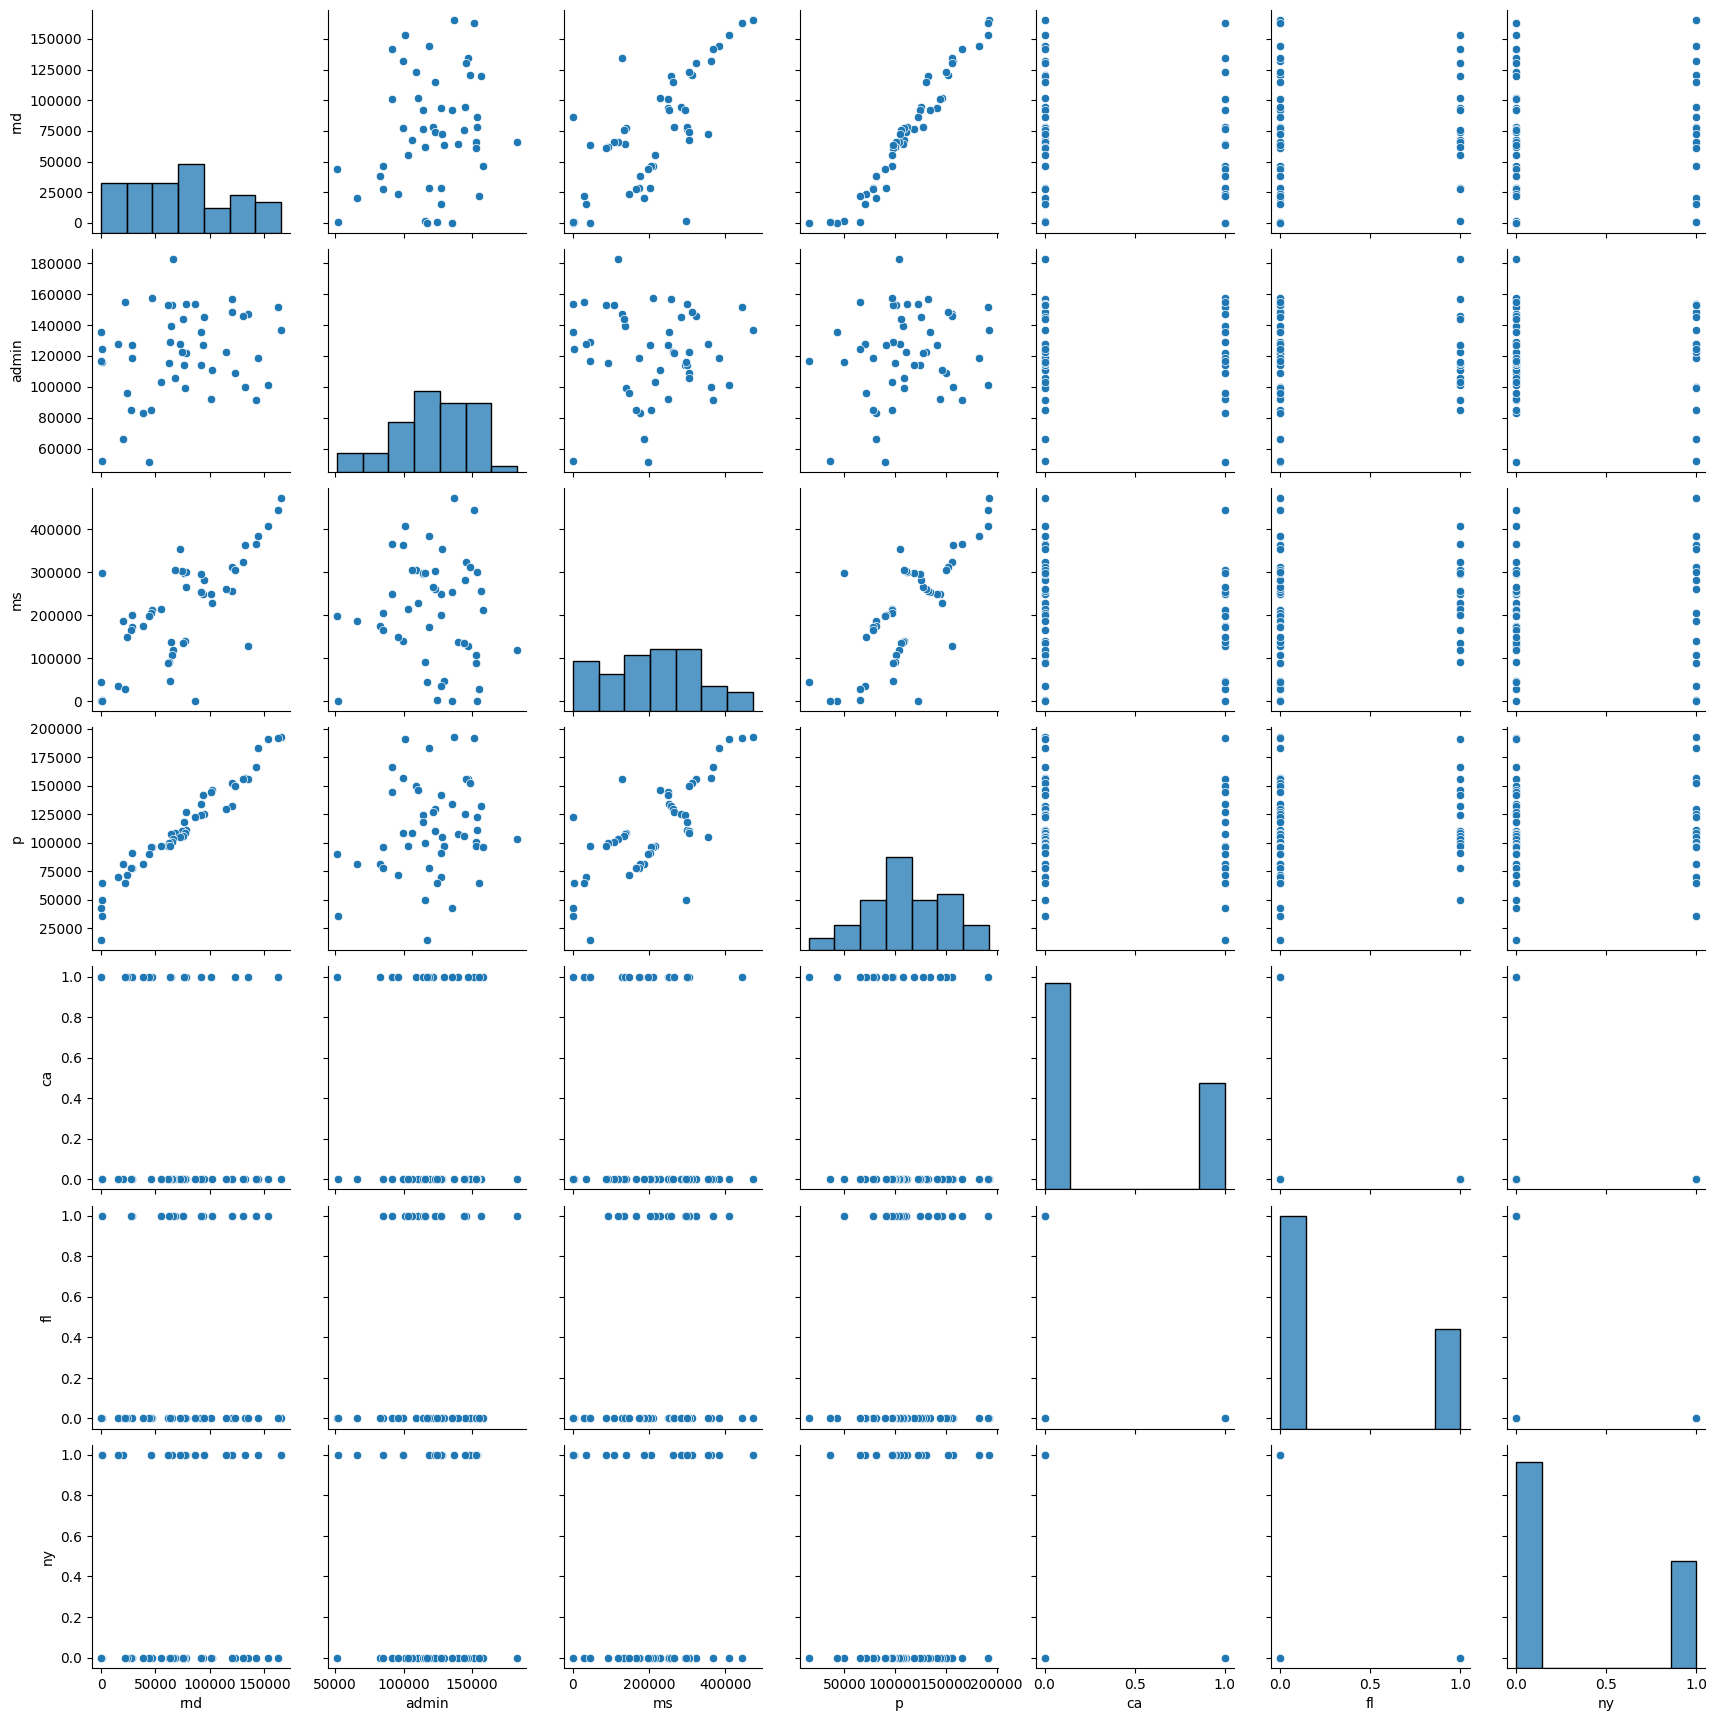

In [15]:
sns.pairplot(df1)

In [17]:
df1.corr()

,rnd,admin,ms,p,ca,fl,ny
rnd,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
ms,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
p,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
ca,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
fl,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
ny,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


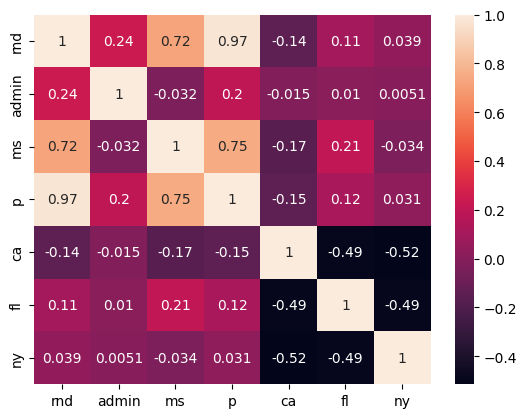

In [18]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

By seeing the heatmap and correlation we will get to know that the profit is 97% corelated with the  R&D speed and 20% corelated with the adiministration.Also negatively corelated with the State_California	and less corelated with State_Florida	State_New_york.

In [20]:
df1.isna().sum()

rnd      0
admin    0
ms       0
p        0
ca       0
fl       0
ny       0
dtype: int64

<Axes: >

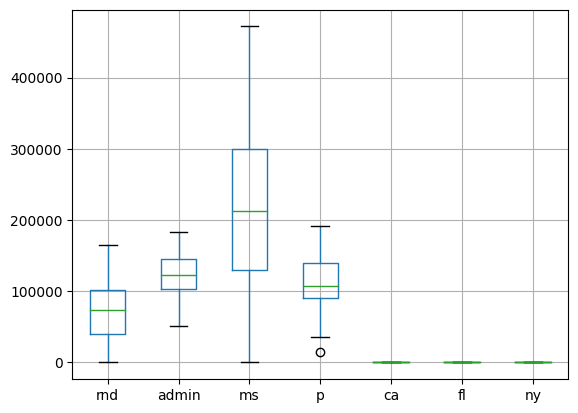

In [21]:
#checking for the outliers
df1.boxplot()

As we can see above boxplots there is one outlier in the profit column.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e733476a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e73347be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e73347400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e73370160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e73370400>],
 'means': []}

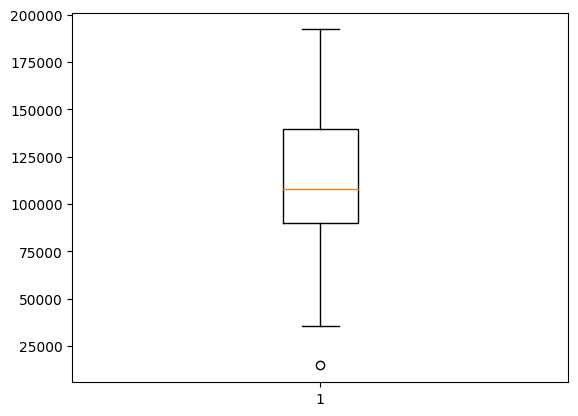

In [24]:
box1 = plt.boxplot(df1['p'])
box1

In [25]:
#we can use get_ydata of list comprehense method
[item.get_ydata() for item in box1['fliers']]

[array([14681.4])]

In [26]:
df1['p']<=14681.4

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49     True
Name: p, dtype: bool

In [27]:
df1.drop(49,axis = 0,inplace = True)

In [28]:
df1

,rnd,admin,ms,p,ca,fl,ny
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


# **Preparing a model**

In [29]:
def model_check(string,data):
    X=smf.ols(string,data).fit()
    return(X.summary())

In [31]:
model1=model_check('p~rnd+admin+ms+ca+fl+ny',data=df1)
model1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.51e-29
Time:                        16:37:45   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
rnd            0.7836      0.039     20.056      0.000       0.705       0.862
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
ms             0.0258      0.014      1.804      0.078      -0.003       0.055
ca          1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
fl          1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
ny          1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     4.66e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**As per above model1 the p value of admin and ms is greater than 0.05 so admin and ms are not significant,hence checking will check it individually.**

In [32]:
model1_a=model_check('p~admin' ,data=df1)
model1_a

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Wed, 31 May 2023   Prob (F-statistic):              0.156
Time:                        16:41:19   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
admin          0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**As per model1_a , admin is not significant.**

In [33]:
model1_m=model_check('p~ms' , data=df1)
model1_m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.30e-09
Time:                        16:43:43   Log-Likelihood:                -566.59
No. Observations:                  49   AIC:                             1137.
Df Residuals:                      47   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.406e+04   7601.574      8.428      0.000    4.88e+04    7.94e+04
ms             0.2329      0.031      7.527      0.000       0.171       0.295
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**As per the model1_m , ms is significant.**

# **Calculating VIF value for checking the Multicollinearity**

In [34]:
#Checking VIF value to see if there's some collinearity in the variables

rsq_rnd = smf.ols("rnd~admin+ms", data= df1).fit().rsquared
ViF_rnd = 1/(1-rsq_rnd)

rsq_adm = smf.ols("admin~rnd+ms", data=df1).fit().rsquared
ViF_adm = 1/(1-rsq_adm)

rsq_mar = smf.ols("ms~admin+rnd", data= df1).fit().rsquared
ViF_mar = 1/(1-rsq_mar)

d1 = {'Variables':['rnd','admin','ms'],'VIF':[ViF_rnd,ViF_adm,ViF_mar]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rnd,2.377754
1,admin,1.175172
2,ms,2.239957


**Since all VIF's are below 5,hence there's no Multicollinearity among the features**

# **Residual Analysis**

In [78]:
model_r=smf.ols('p~rnd+admin+ms+ca+fl+ny',data=df1).fit()
model_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.51e-29
Time:                        17:26:45   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
rnd            0.7836      0.039     20.056      0.000       0.705       0.862
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
ms             0.0258      0.014      1.804      0.078      -0.003       0.055
ca          1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
fl          1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
ny          1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     4.66e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
y_pred=model_r.predict()

In [80]:
#calculating error using actual value-predicted value
df1['p']-y_pred

0      2103.543814
1      2874.720587
2     10694.367621
3     11066.868378
4     -4423.099177
5     -4942.775088
6     -2796.090300
7     -3320.587404
8      1559.651080
9     -5744.777225
10    10967.282206
11     7567.444947
12    12572.633164
13     5303.686160
14   -16374.515563
15   -15306.706646
16     8335.604545
17    -4328.626135
18    -4542.513614
19     7014.838788
20      138.854192
21    -5890.450112
22    -4572.189923
23    -1539.378722
24    -4687.432233
25     2865.472822
26    -5395.474562
27    -9223.381138
28      681.678987
29    -1224.630972
30     -262.046827
31     -762.501777
32    -3982.146650
33    -1793.100995
34     4984.357361
35     5564.445851
36    14037.325082
37    -1920.986205
38    10620.728755
39    -5278.728238
40      477.979569
41     1745.939804
42    -2108.753231
43     8071.376720
44    -2879.569186
45    15402.088727
46    -8476.320070
47    -7837.069144
48   -15037.038014
Name: p, dtype: float64

In [81]:
#calculating the errors using resid
model_r.resid

0      2103.543814
1      2874.720587
2     10694.367621
3     11066.868378
4     -4423.099177
5     -4942.775088
6     -2796.090300
7     -3320.587404
8      1559.651080
9     -5744.777225
10    10967.282206
11     7567.444947
12    12572.633164
13     5303.686160
14   -16374.515563
15   -15306.706646
16     8335.604545
17    -4328.626135
18    -4542.513614
19     7014.838788
20      138.854192
21    -5890.450112
22    -4572.189923
23    -1539.378722
24    -4687.432233
25     2865.472822
26    -5395.474562
27    -9223.381138
28      681.678987
29    -1224.630972
30     -262.046827
31     -762.501777
32    -3982.146650
33    -1793.100995
34     4984.357361
35     5564.445851
36    14037.325082
37    -1920.986205
38    10620.728755
39    -5278.728238
40      477.979569
41     1745.939804
42    -2108.753231
43     8071.376720
44    -2879.569186
45    15402.088727
46    -8476.320070
47    -7837.069144
48   -15037.038014
dtype: float64

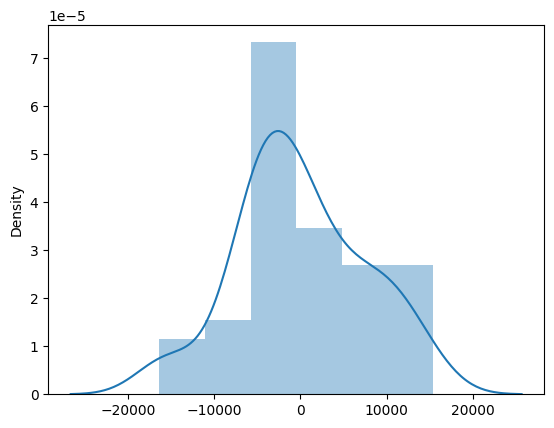

In [82]:
sns.distplot(model_r.resid)
plt.show()

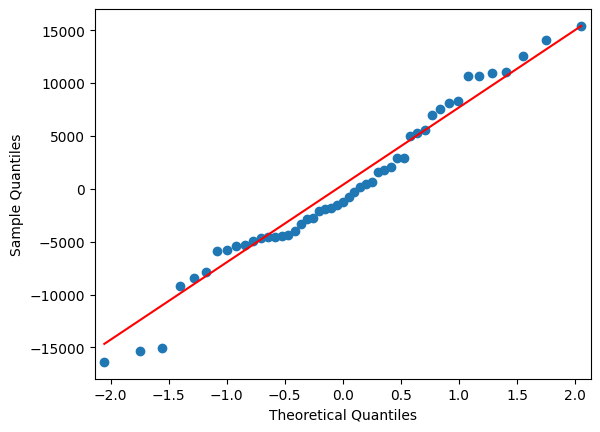

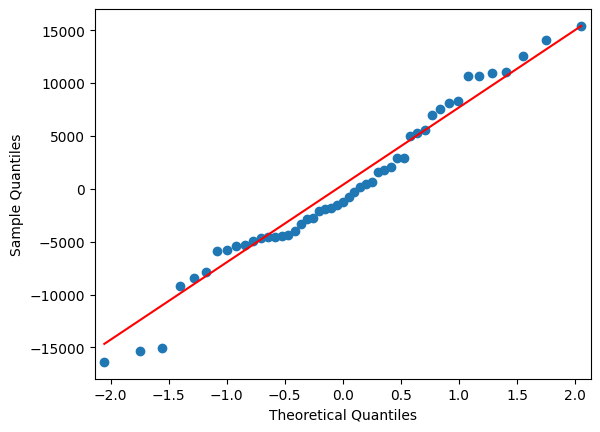

In [83]:
import statsmodels.api as sm
sm.qqplot(model_r.resid,line='q')

# **Checking for Homoscadacity:**

i.e error and target do not have any pattern.


In [84]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

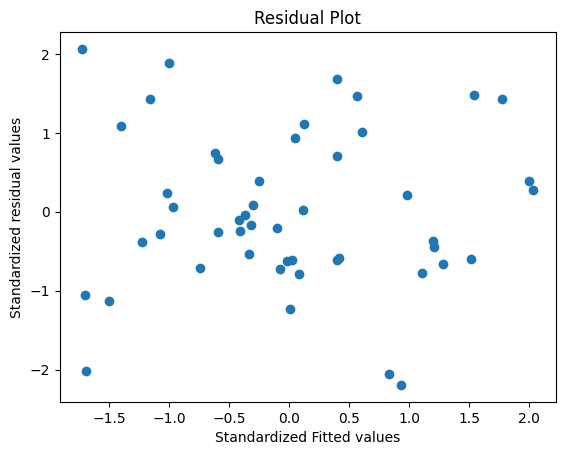

In [85]:
plt.scatter(get_standardized_values(model_r.fittedvalues),
            get_standardized_values(model_r.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# **Checking for Residual vs Regressor:**

i.e Error and feature do not have any pattern

eval_env: 1


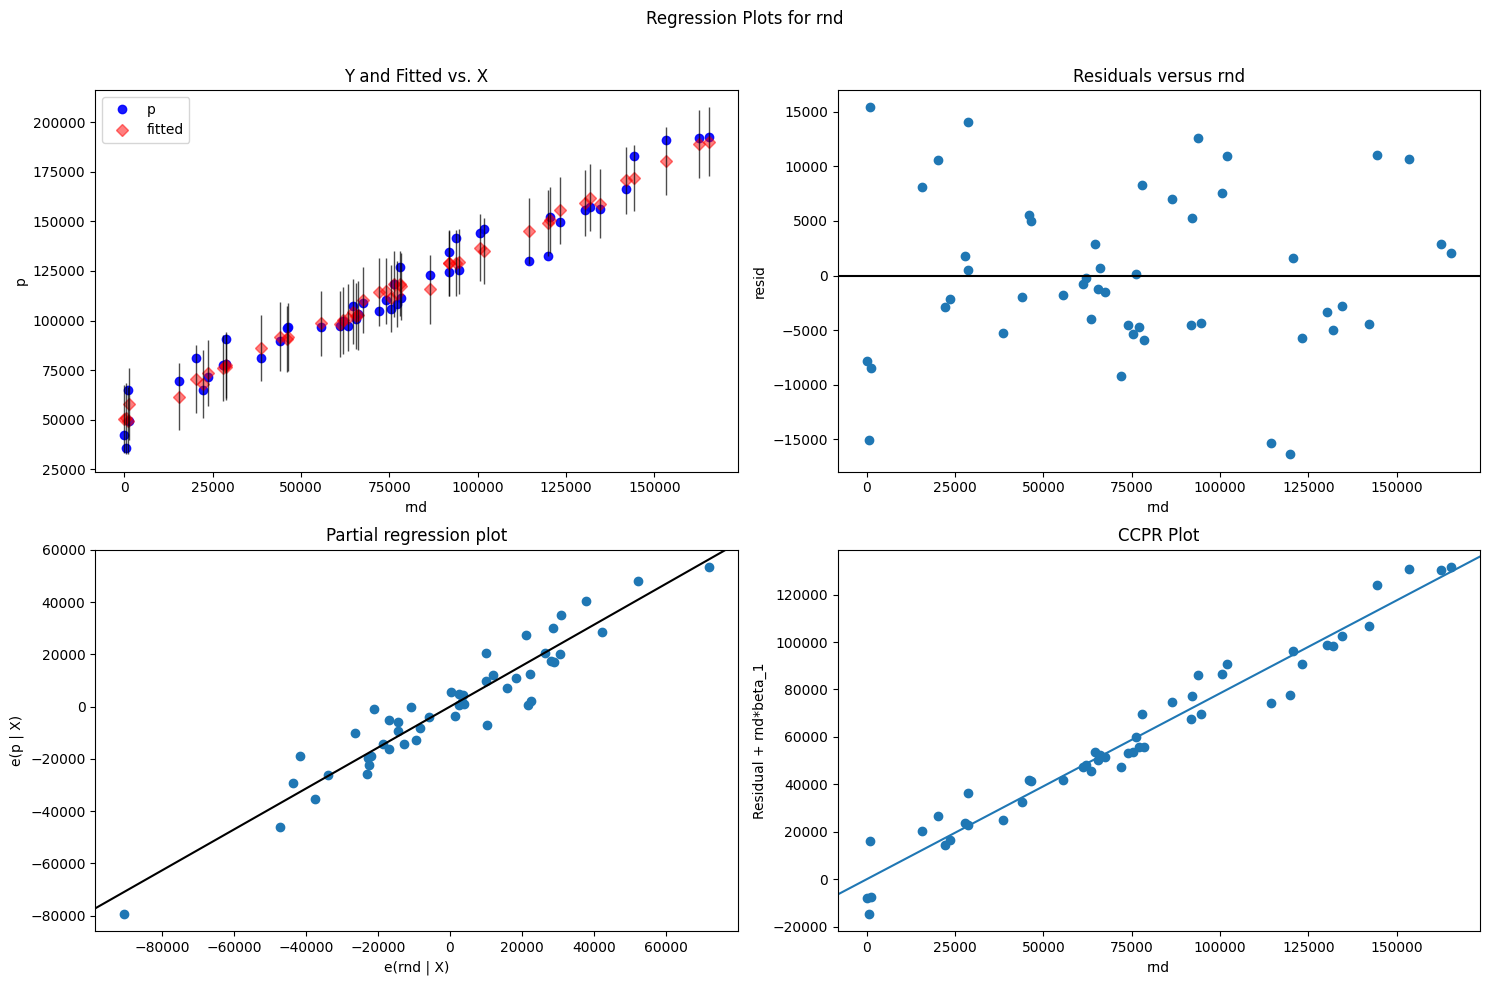

In [86]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_r, "rnd", fig=fig)
plt.show()

eval_env: 1


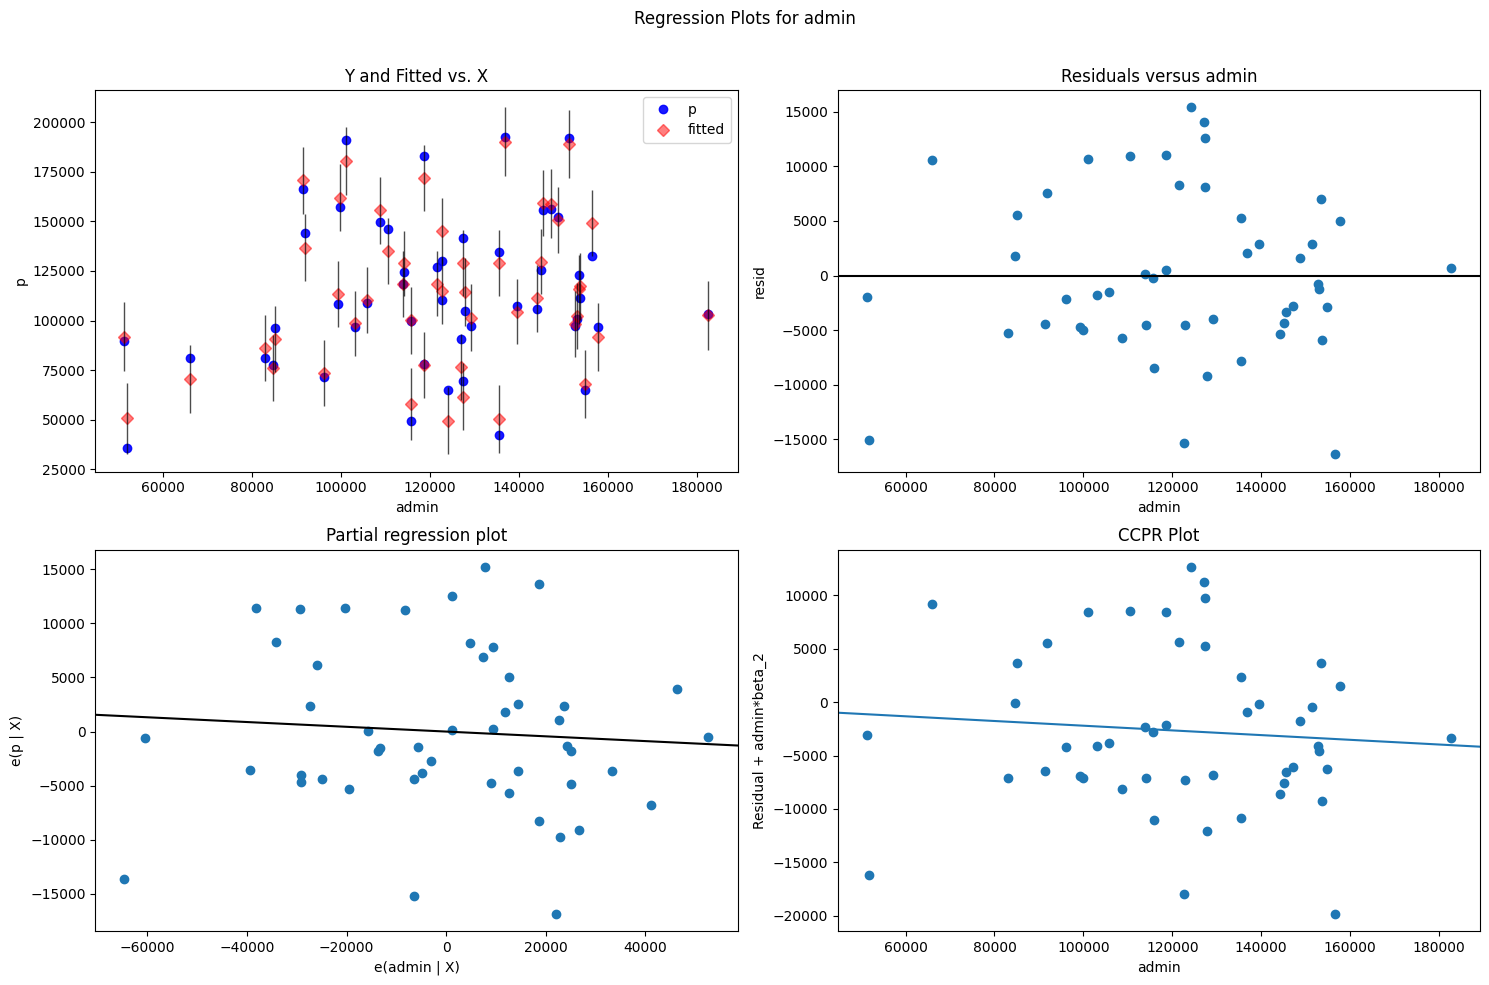

In [87]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_r, "admin", fig=fig)
plt.show()

eval_env: 1


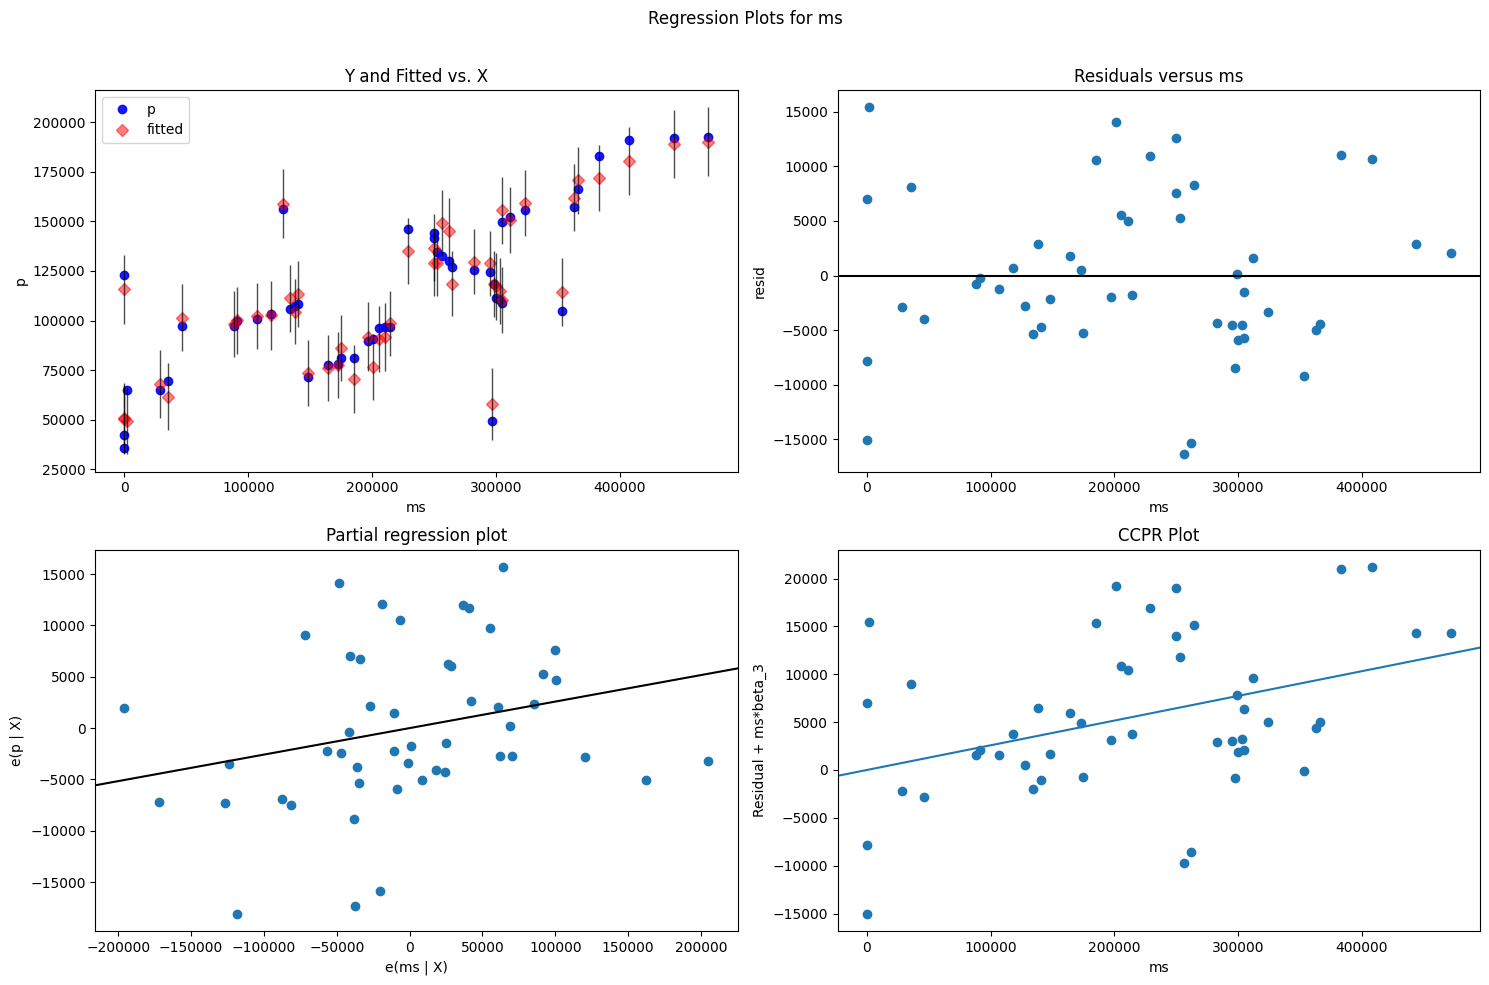

In [88]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_r, "ms", fig=fig)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


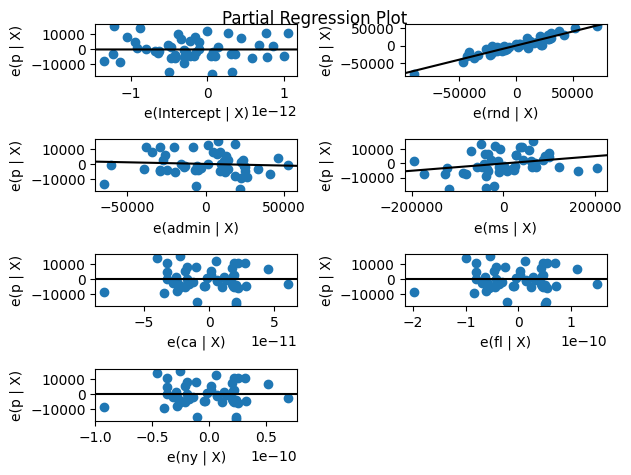

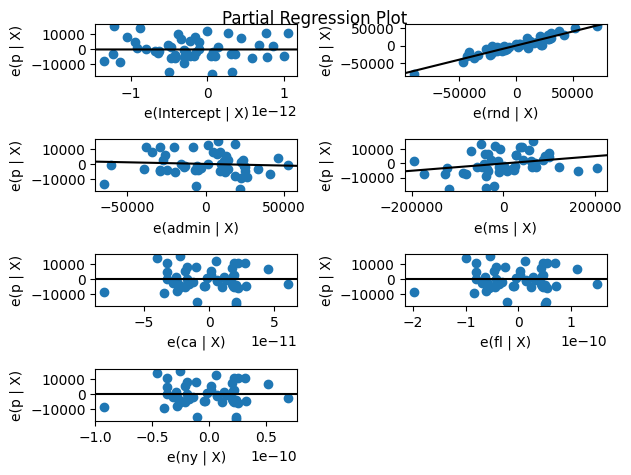

In [89]:
sm.graphics.plot_partregress_grid(model_r)

**As we can see above scatter plots there is no any pattern among feature and error.**

# **Model Dignostics**

Dectecting outliers/influencers using cook's distance.

# Iteration 1

In [90]:
model_influence = model_r.get_influence()
(c1, _) = model_influence.cooks_distance

In [91]:
c1

array([2.60457605e-03, 5.43611572e-03, 5.23635210e-02, 4.19973961e-02,
       9.28253204e-03, 8.54263313e-03, 6.15649426e-03, 2.94777096e-03,
       6.61625485e-04, 1.00106985e-02, 3.00216663e-02, 1.80966911e-02,
       2.74109701e-02, 5.58584271e-03, 8.16580856e-02, 4.79941101e-02,
       1.36540404e-02, 4.49466147e-03, 3.66606422e-03, 3.85763193e-02,
       4.76013414e-06, 1.43944528e-02, 4.51284502e-03, 5.56408037e-04,
       6.09035584e-03, 1.66340828e-03, 8.20130646e-03, 3.95477553e-02,
       2.87584982e-04, 4.13082585e-04, 2.37475576e-05, 1.70903058e-04,
       5.52206253e-03, 6.49964470e-04, 1.13338164e-02, 8.64860401e-03,
       6.23177043e-02, 2.44421552e-03, 5.76911886e-02, 8.19936250e-03,
       5.81863937e-05, 1.02900623e-03, 1.17662762e-03, 2.05607948e-02,
       3.46461151e-03, 9.43851946e-02, 8.24936996e-02, 2.51127784e-02,
       2.43528176e-01])

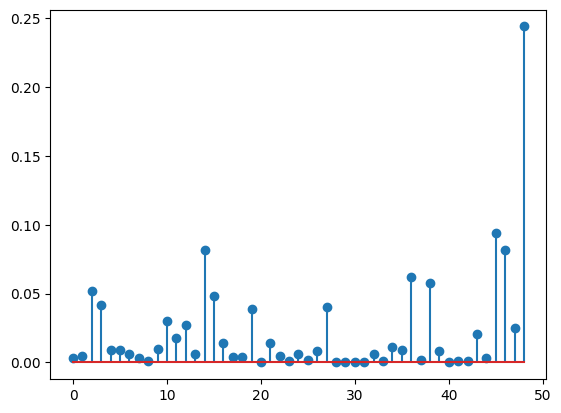

In [92]:
plt.stem(np.arange(len(df1)),np.round(c1,3))
plt.show()

In [93]:
np.argmax(c1),np.max(c1)

(48, 0.2435281757140373)

In [94]:
df2=df1.drop([48],axis=0).reset_index()

In [95]:
df2 = df2.drop(['index'],axis=1)

In [96]:
model_c1=smf.ols('p~rnd+admin+ms+ca+fl+ny',data=df2).fit()
model_c1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 31 May 2023   Prob (F-statistic):           7.02e-29
Time:                        17:27:01   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.409e+04   4569.825      9.648      0.000    3.49e+04    5.33e+04
rnd            0.7888      0.037     21.160      0.000       0.714       0.864
admin         -0.0621      0.045     -1.381      0.174      -0.153       0.029
ms             0.0179      0.014      1.275      0.209      -0.010       0.046
ca           1.53e+04   2035.915      7.516      0.000    1.12e+04    1.94e+04
fl          1.415e+04   2261.128      6.259      0.000    9588.163    1.87e+04
ny          1.464e+04   2223.793      6.581      0.000    1.01e+04    1.91e+04
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.96e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Rsquared value has increased,ms and admin are still insignificant.**

# Iteration 2

In [99]:
model_influence = model_c1.get_influence()
(c2, _) = model_influence.cooks_distance

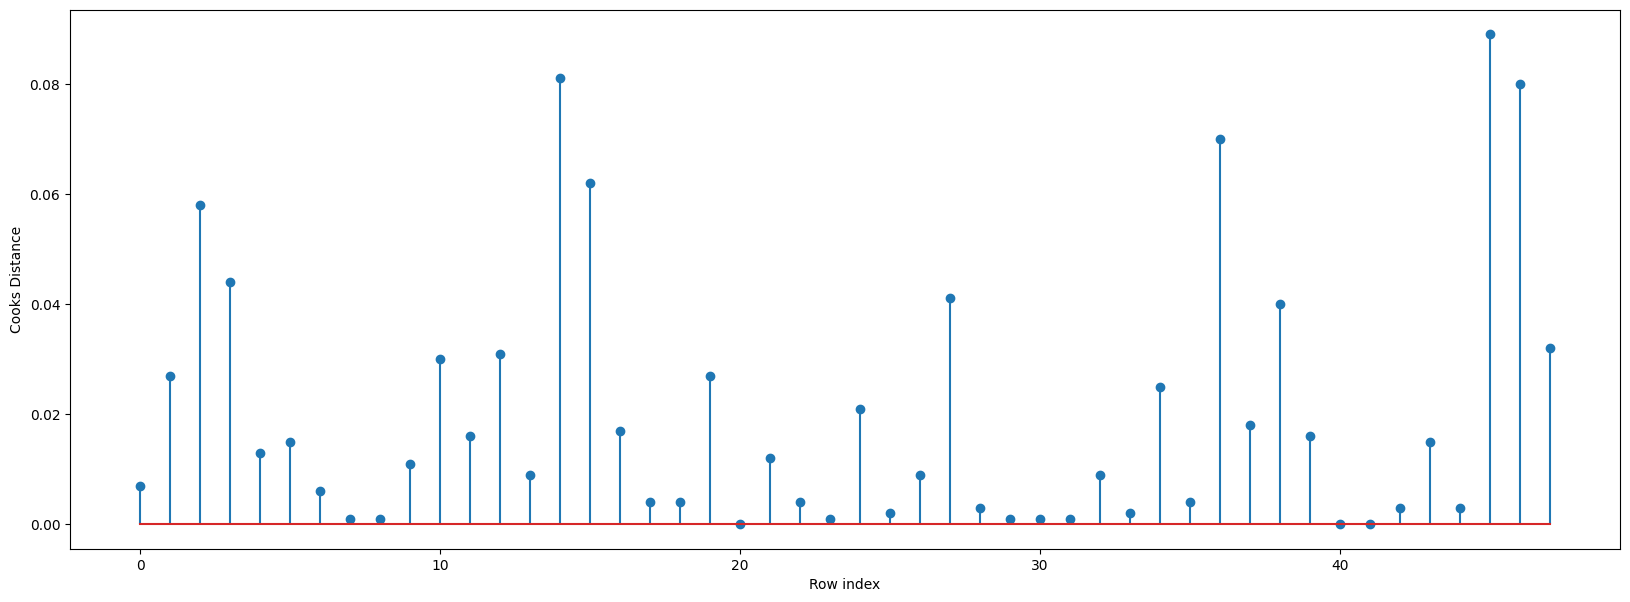

In [100]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

**Since cook's distance of most of the points seems to lie in the same range,hence we can conclude that there are no more outliers/influence points.**

# **Final Model**

**Since the co-relation of admin with  profit is less and also as per the p-value it's insignificant,hence we can drop the admin variable.**

In [102]:
final_model= smf.ols('p~rnd+ms+ca+fl+ny',data=df2).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.02e-29
Time:                        17:38:19   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.83e+04   1841.077     20.803      0.000    3.46e+04     4.2e+04
rnd            0.7692      0.035     22.072      0.000       0.699       0.840
ms             0.0251      0.013      1.908      0.063      -0.001       0.052
ca          1.353e+04   1599.496      8.461      0.000    1.03e+04    1.68e+04
fl          1.216e+04   1761.727      6.904      0.000    8609.549    1.57e+04
ny           1.26e+04   1685.592      7.478      0.000    9204.975     1.6e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.54e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **So this is our final model which gives us 96.1% accuracy/rsquared value.**